# <font color='red'>Implement SGD Classifier with Logloss and L2 regularization Using SGD without using sklearn</font>

<font color='red'> Importing packages</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import linear_model

<font color='red'>Creating custom dataset</font>

In [2]:
# please don't change random_state
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
# make_classification is used to create custom dataset 
# Please check this link (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) for more details

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

<font color='red'>Splitting data into train and test </font>

In [4]:
#please don't change random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

# <font color='red' size=5>SGD classifier</font>

In [6]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf
# Please check this documentation (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) 

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0001, fit_intercept=True,
       l1_ratio=0.15, learning_rate='constant', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=15, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=2, warm_start=False)

In [7]:
clf.fit(X=X_train, y=y_train) # fitting our model

-- Epoch 1
Norm: 0.76, NNZs: 15, Bias: -0.314605, T: 37500, Avg. loss: 0.455801
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.92, NNZs: 15, Bias: -0.469578, T: 75000, Avg. loss: 0.394737
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580452, T: 112500, Avg. loss: 0.385561
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.660824, T: 150000, Avg. loss: 0.382161
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.717218, T: 187500, Avg. loss: 0.380474
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.06, NNZs: 15, Bias: -0.761816, T: 225000, Avg. loss: 0.379481
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.793932, T: 262500, Avg. loss: 0.379096
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 1.07, NNZs: 15, Bias: -0.820446, T: 300000, Avg. loss: 0.378826
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.840093, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0001, fit_intercept=True,
       l1_ratio=0.15, learning_rate='constant', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=15, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=2, warm_start=False)

In [8]:
clf.coef_, clf.coef_.shape, clf.intercept_
#clf.coef_ will return the weights
#clf.coef_.shape will return the shape of weights
#clf.intercept_ will return the intercept term

(array([[-0.42328902,  0.18380407, -0.14437354,  0.34064016, -0.21316099,
          0.56702655, -0.44910569, -0.09094413,  0.21219292,  0.17750247,
          0.19931732, -0.00506998, -0.07781235,  0.33343476,  0.0320374 ]]),
 (1, 15),
 array([-0.85032916]))

## <font color='red' size=5> Implement Logistic Regression with L2 regularization Using SGD: without using sklearn </font>




<br>

* Initialize the weight_vector and intercept term to zeros (Write your code in <font color='blue'>def initialize_weights()</font>)

* Create a loss function (Write your code in <font color='blue'>def logloss()</font>) 

 $log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$
- for each epoch:

    - for each batch of data points in train: (keep batch size=1)

        - calculate the gradient of loss function w.r.t each weight in weight vector (write your code in <font color='blue'>def gradient_dw()</font>)

        $dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)})$ <br>

        - Calculate the gradient of the intercept (write your code in <font color='blue'> def gradient_db()</font>) <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>

           $ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t}))$

        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)}← w^{(t)}+α(dw^{(t)}) $<br>

        $b^{(t+1)}←b^{(t)}+α(db^{(t)}) $
    - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
    - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
    - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


<font color='blue'>Initialize weights </font>

In [9]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights to zeros array of (dim,1) dimensions
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    w= np.zeros_like(dim)
    b=0

    return w,b



In [10]:
dim=X_train[0] 
w,b = initialize_weights(dim)
print('w =',(w))
print('b =',str(b))

w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0


In [11]:
dim=X_train[0] 
w,b = initialize_weights(dim)
def grader_weights(w,b):
  assert((len(w)==len(dim)) and b==0 and np.sum(w)==0.0)
  return True
grader_weights(w,b)

True

<font color='blue'>Compute sigmoid </font>

$sigmoid(z)= 1/(1+exp(-z))$

In [12]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    sig = 1/(1+np.exp(-z))

    return sig

In [13]:
def grader_sigmoid(z):
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

<font color='blue'> Compute loss </font>

$log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$

In [14]:
def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''
    loss=0
    for i in range(len(y_true)):
        loss+=((y_true[i]*np.log10(y_pred[i]))+((1-y_true[i])*np.log10((1-y_pred[i]))))
        
    loss =(-1*loss)/len(y_true)
    return loss
    

In [15]:
def grader_logloss(true,pred):
  loss=logloss(true,pred)
  assert(loss==0.07644900402910389)
  return True
true=[1,1,0,1,0]
pred=[0.9,0.8,0.1,0.8,0.2]
grader_logloss(true,pred)

True

<font color='blue'>Compute gradient w.r.to  'w' </font>

$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)})$ <br>

In [16]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw0 = np.dot(w, x) + b
    dw = x*(y - sigmoid(dw0)) - ((alpha/(N)) * w)
    return dw

In [17]:
def grader_dw(x,y,w,b,alpha,N):
  grad_dw=gradient_dw(x,y,w,b,alpha,N)
  assert(np.sum(grad_dw)==2.613689585)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0
grad_w,grad_b=initialize_weights(grad_x)
alpha=0.0001
N=len(X_train)
grader_dw(grad_x,grad_y,grad_w,grad_b,alpha,N)

True

### <font color='blue'>Compute gradient w.r.to 'b' </font>

#### $ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t}))$

In [18]:
 def gradient_db(x,y,w,b):
    '''In this function, we will compute gradient w.r.to b '''
    db0 = np.dot(w, x) + b
    db = y - sigmoid(db0)
    return db
    

In [19]:
def grader_db(x,y,w,b):
  grad_db=gradient_db(x,y,w,b)
  assert(grad_db==-0.5)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0
grad_w,grad_b=initialize_weights(grad_x)
alpha=0.0001
N=len(X_train)
grader_db(grad_x,grad_y,grad_w,grad_b)

True

In [20]:
def find_proba(w,b, X):
    #print("Xtra",X)
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b       
        predict.append(sigmoid(z))
    return np.array(predict)
   

<font color='blue'> Implementing logistic regression</font>

In [21]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    #Here eta0 is learning rate
    #implement the code as follows
    # initalize the weights (call the initialize_weights(X_train[0]) function)
    w,b = initialize_weights(X_train[0]) 
    # for every epoch
    gw,gb = 0,0
    trainloss_list = []
    testloss_list = []
    N = len(X_train)
    for i in range(epochs):
        print("Epoch: "+str(i))
        # for every data point(X_train,y_train)
        for i in range(N):
            gw=gradient_dw(X_train[i],y_train[i],w,b,alpha,N)
           #compute gradient w.r.to w (call the gradient_dw() function)
            gb=gradient_db(X_train[i],y_train[i],w,b)
           #compute gradient w.r.to b (call the gradient_db() function)
           #update w, b
            w=w+(eta0*gw)
            b=b+(eta0*gb)
        # predict the output of x_train[for all data points in X_train] using w,b
        #print(w,b)
        ytrain_pred = find_proba(w,b, X_train)
        #compute the loss between predicted and actual values (call the loss function)
        losstr =logloss(y_train,ytrain_pred)
        print("Train loss: ",losstr)
        # store all the train loss values in a list
        trainloss_list.append(losstr)
        # predict the output of x_test[for all data points in X_test] using w,b
        ytest_pred = find_proba(w,b, X_test)
        #compute the loss between predicted and actual values (call the loss function)
        losste =logloss(y_test,ytest_pred)
        # store all the test loss values in a list
        print("Test loss: ",losste)
        testloss_list.append(losste)
        # you can also compare previous loss and current loss, if loss is not updating then stop the process and return w,b
        
    return w,b,trainloss_list,testloss_list

In [22]:
alpha=0.0001
eta0=0.0001
N=len(X_train)
epochs=50
w,b,trainloss_list,testloss_list=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)


Epoch: 0
Train loss:  0.1754574844285461
Test loss:  0.1759547442321374
Epoch: 1
Train loss:  0.16867157050333045
Test loss:  0.16939931358951013
Epoch: 2
Train loss:  0.1663916799246292
Test loss:  0.16720591194885742
Epoch: 3
Train loss:  0.1653682753740316
Test loss:  0.16621717799334954
Epoch: 4
Train loss:  0.16485707459547086
Test loss:  0.16571959463978406
Epoch: 5
Train loss:  0.1645882001292827
Test loss:  0.16545557095508645
Epoch: 6
Train loss:  0.16444271323364382
Test loss:  0.1653113502079951
Epoch: 7
Train loss:  0.16436263615826985
Test loss:  0.16523116853179268
Epoch: 8
Train loss:  0.16431806946667749
Test loss:  0.1651860589844903
Epoch: 9
Train loss:  0.1642930737413251
Test loss:  0.16516045651849878
Epoch: 10
Train loss:  0.16427897430934066
Test loss:  0.16514582028704108
Epoch: 11
Train loss:  0.16427098545835506
Test loss:  0.1651373983536637
Epoch: 12
Train loss:  0.1642664419100352
Test loss:  0.16513252084404828
Epoch: 13
Train loss:  0.16426384911424854
Te

<font color='red'>Goal of assignment</font>

Compare implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [26]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
print(w-clf.coef_, b-clf.intercept_)

print(clf.coef_,clf.intercept_)
print(w,b)

[[-0.00650342  0.00923113 -0.0040964  -0.00254652 -0.00812134  0.00292237
   0.00392405  0.00104009  0.00963658 -0.00367283 -0.00056886  0.00448568
  -0.00352176  0.00565534 -0.00904944]] [-0.04192301]
[[-0.42328902  0.18380407 -0.14437354  0.34064016 -0.21316099  0.56702655
  -0.44910569 -0.09094413  0.21219292  0.17750247  0.19931732 -0.00506998
  -0.07781235  0.33343476  0.0320374 ]] [-0.85032916]
[-0.42979243  0.1930352  -0.14846994  0.33809364 -0.22128233  0.56994892
 -0.44518163 -0.08990403  0.2218295   0.17382964  0.19874846 -0.0005843
 -0.08133411  0.3390901   0.02298796] -0.8922521633477


<font color='blue'>Plot epoch number vs train , test loss </font>

* epoch number on X-axis
* loss on Y-axis

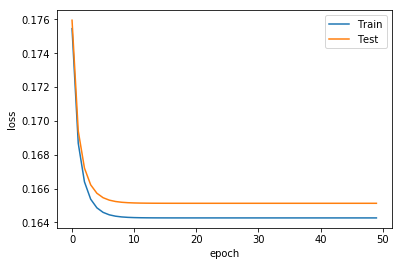

In [27]:
import matplotlib.pyplot as plt
plt.plot(range(epochs),trainloss_list)
plt.plot(range(epochs),testloss_list)

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'])
plt.show()

In [28]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        if sigmoid(z) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

0.9522133333333334
0.95
